 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("../../Starter_Code/Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
#Validate my data is being read
whale_data.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_data = whale_data.dropna()
#Confirm the drop
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whale_data.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_path = Path("../../Starter_Code/Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
#confirm right
algo_data.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [7]:
algo_data.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

In [8]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_data = algo_data.dropna()
#confirm the drop
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
algo_data.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../../Starter_Code/Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
#confirm it's right
sp500_data.head()

Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [12]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [13]:
sp500_data.isnull().sum()

Close    0
dtype: int64

In [14]:
sp500_data.columns

Index(['Close'], dtype='object')

In [15]:
# Fix Data Types
sp500_data = sp500_data['Close'].str.replace('$','', regex = True).astype("float")
sp500_data.head()

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: Close, dtype: float64

In [16]:
# Calculate Daily Returns
sp500_data = sp500_data.pct_change()
sp500_data.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [17]:
# Drop nulls
sp500_data = sp500_data.dropna()

In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp500_data.columns = ["S&P 500"]
sp500_data.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [19]:
sp500_data.columns

['S&P 500']

## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data = pd.concat([whale_data, algo_data, sp500_data],axis="columns", join="inner")
joined_data

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-15                     0.000398               -0.010492 -0.004331   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   

              Algo 2     Close  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254  
...              ...       ...  
2019-04-15 -0.004572 -0.000509  
2019-04-16  0.002899  0.002279  
2019-04-17 -0.005228 -0.001577  
2019-04-18 -0.001229 -0.001011  
2019-04-22 -0.001936 -0.008764  

[1042 rows x 7 columns]

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

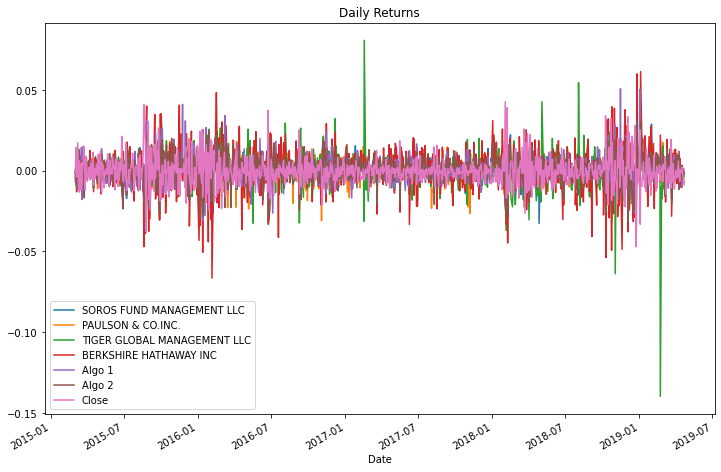

In [21]:
# Plot daily returns of all portfolios
joined_data.plot(figsize=(12,8), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='Date'>

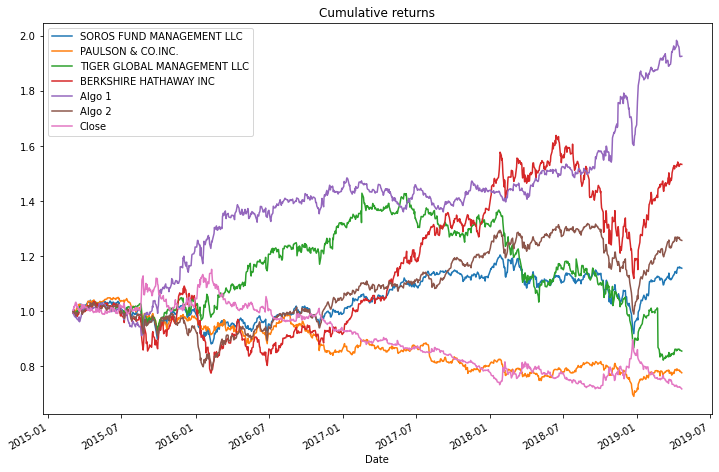

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize =(12,8), title= "Cumulative returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Algo Portfilo'}>

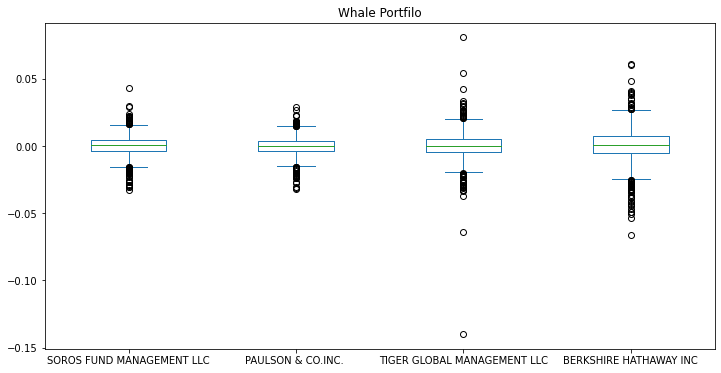

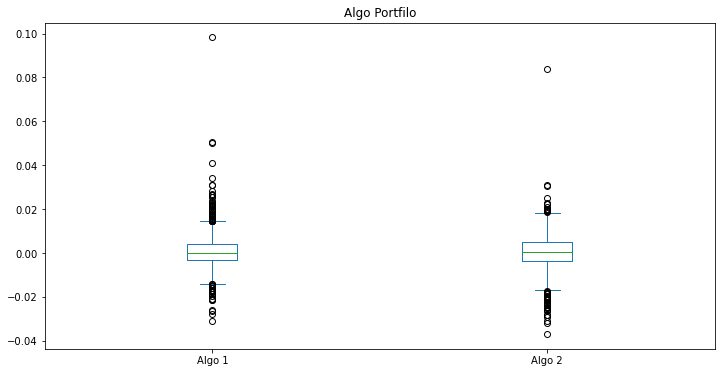

In [23]:
# Box plot to visually show risk
whale_data.plot(kind='box', title="Whale Portfilo", figsize=(12,6))
algo_data.plot(kind='box', title="Algo Portfilo", figsize=(12,6))


### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
daily_std_whale = whale_data.std()
daily_std_whale
daily_std_algo = algo_data.std()
daily_std_algo


Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = sp500_data.std()
# Determine which portfolios are riskier than the S&P 500
volatility = joined_data.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
Close                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_whale = daily_std_whale*np.sqrt(252)
annualized_std_whale

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling window of Portfolios'}, xlabel='Date'>

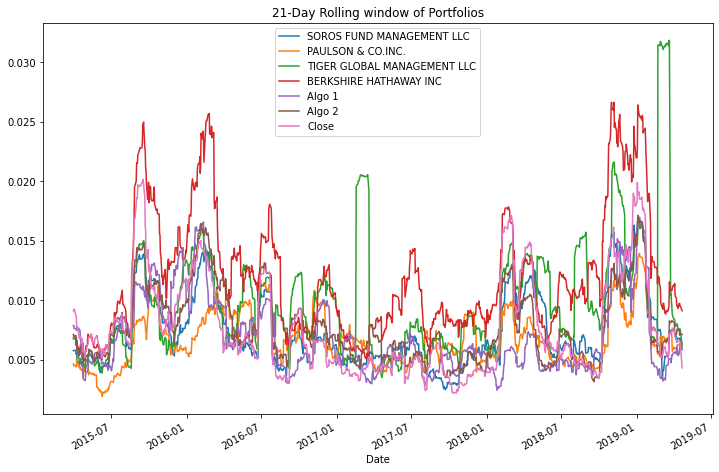

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_data.rolling(window=21).std()
# Plot the rolling standard deviation
joined_data.rolling(window=21).std().plot(figsize=(12,8), title="21-Day Rolling window of Portfolios")

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
Close                                         0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2         

<AxesSubplot:>

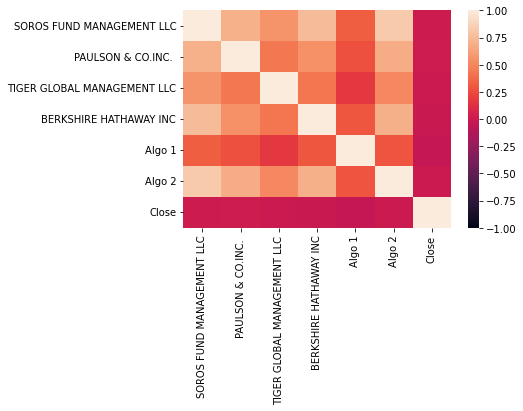

In [28]:
# Calculate the correlation
joined_data_correlation = joined_data.corr()
print(joined_data_correlation)
# Display de correlation matrix
import seaborn as sns
sns.heatmap(joined_data_correlation, vmin=-1, vmax=1, )

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [29]:
# Calculate covariance of a single portfolio
covariance = joined_data['Algo 1'].cov(joined_data['Close'])
# Calculate variance of S&P 500
variance = joined_data['Close'].var()
# Computing beta
beta = covariance / variance
beta
# Plot beta trend
beta.plot(figuresize=(12, 8), title='Beta trend')

AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios =(joined_data.mean()*252)/ (joined_data.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Rations'}>

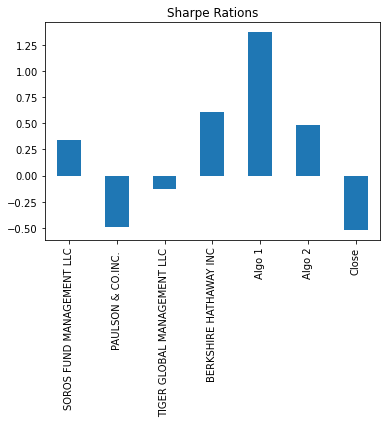

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Rations")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Reading data from 1st stock
sq_path = Path("../Resource/sq_google_finance.csv")
sq_data = pd.read_csv(sq_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sq_data.head()

Close
Date                       
2021-01-04 16:00:00  221.16
2021-01-05 16:00:00  229.75
2021-01-06 16:00:00  226.89
2021-01-07 16:00:00  239.48
2021-01-08 16:00:00  241.45

In [37]:
# Reading data from 2nd stock
pypl_path = Path("../Resource/pypl_google_finance.csv")
pypl_data = pd.read_csv(pypl_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
pypl_data.head()

Close
Date                       
2021-01-04 16:00:00  231.92
2021-01-05 16:00:00  234.91
2021-01-06 16:00:00  226.83
2021-01-07 16:00:00  235.04
2021-01-08 16:00:00  242.46

In [39]:
# Reading data from 3rd stock
ba_path = Path("../Resource/ba_google_finance.csv")
ba_data = pd.read_csv(ba_path, parse_dates = True, index_col="Date", infer_datetime_format=True)
ba_data.head()

Close
Date                       
2021-01-04 16:00:00  202.72
2021-01-05 16:00:00  211.63
2021-01-06 16:00:00  211.03
2021-01-07 16:00:00  212.71
2021-01-08 16:00:00  209.90

In [50]:
# Combine all stocks in a single DataFrame
stock_data = pd.concat([sq_data, pypl_data, ba_data], axis="columns", join="inner")
stock_data.columns = ["SQ", "PYPL", "BA"]
stock_data.head()

SQ    PYPL      BA
Date                                       
2021-01-04 16:00:00  221.16  231.92  202.72
2021-01-05 16:00:00  229.75  234.91  211.63
2021-01-06 16:00:00  226.89  226.83  211.03
2021-01-07 16:00:00  239.48  235.04  212.71
2021-01-08 16:00:00  241.45  242.46  209.90

In [51]:
# Reset Date index
stock_data.reset_index()

Date      SQ    PYPL      BA
0   2021-01-04 16:00:00  221.16  231.92  202.72
1   2021-01-05 16:00:00  229.75  234.91  211.63
2   2021-01-06 16:00:00  226.89  226.83  211.03
3   2021-01-07 16:00:00  239.48  235.04  212.71
4   2021-01-08 16:00:00  241.45  242.46  209.90
..                  ...     ...     ...     ...
247 2021-12-27 16:00:00  168.48  192.01  203.17
248 2021-12-28 16:00:00  163.67  190.10  206.13
249 2021-12-29 16:00:00  161.85  189.97  203.66
250 2021-12-30 16:00:00  165.34  191.88  202.71
251 2021-12-31 16:00:00  161.51  188.58  201.32

[252 rows x 4 columns]

In [52]:
# Reorganize portfolio data by having a column per symbol
stock_data = stock_data.pivot_table(index="Date")
stock_data

BA    PYPL      SQ
Date                                       
2021-01-04 16:00:00  202.72  231.92  221.16
2021-01-05 16:00:00  211.63  234.91  229.75
2021-01-06 16:00:00  211.03  226.83  226.89
2021-01-07 16:00:00  212.71  235.04  239.48
2021-01-08 16:00:00  209.90  242.46  241.45
...                     ...     ...     ...
2021-12-27 16:00:00  203.17  192.01  168.48
2021-12-28 16:00:00  206.13  190.10  163.67
2021-12-29 16:00:00  203.66  189.97  161.85
2021-12-30 16:00:00  202.71  191.88  165.34
2021-12-31 16:00:00  201.32  188.58  161.51

[252 rows x 3 columns]

In [56]:
# Calculate daily returns
stock_returns = stock_data.pct_change()
# Drop NAs
stock_returns = stock_returns.dropna()
# Display sample data
stock_returns.head()

BA      PYPL        SQ
Date                                             
2021-01-05 16:00:00  0.043952  0.012892  0.038841
2021-01-06 16:00:00 -0.002835 -0.034396 -0.012448
2021-01-07 16:00:00  0.007961  0.036195  0.055489
2021-01-08 16:00:00 -0.013210  0.031569  0.008226
2021-01-11 16:00:00 -0.014817 -0.020457 -0.066059

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = stock_returns.dot(weights)
# Display sample data
portfolio_returns.tail()

Date
2021-12-27 16:00:00   -0.000183
2021-12-28 16:00:00   -0.007976
2021-12-29 16:00:00   -0.007929
2021-12-30 16:00:00    0.008984
2021-12-31 16:00:00   -0.015740
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [62]:
# Join your returns DataFrame to the original returns DataFrame
my_portfolio_vs_joined_data = pd.concat([portfolio_returns, joined_data], axis="columns", join="inner")
my_portfolio_vs_joined_data.head()

Empty DataFrame
Columns: [0, SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. , TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1, Algo 2, Close]
Index: []

In [64]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
my_portfolio_vs_joined_data = my_portfolio_vs_joined_data.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [65]:
# Calculate the annualized `std`
annual_volatility = my_portfolio_vs_joined_data.std()*np.sqrt(252)
annual_volatility

0                             NaN
SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
Close                         NaN
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
my_portfolio_vs_joined_data.rolling(window=21).std().plot()
# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
my_portfolio_vs_joined_data.corr().plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:

# Calculate covariance of a single portfolio
# covariance = joined_data['Algo 1'].cov(joined_data['Close'])
# # Calculate variance of S&P 500
# variance = joined_data['Close'].var()
# # Computing beta
# beta = covariance / variance
# beta
# # Plot beta trend
# beta.plot(figuresize=(12, 8), title='Beta trend')

# Calculate and plot Beta

rolling_portfolio_covariance = portfolio_returns.rolling(window=60).cov(sp500_data)

portfolio_variance = portfolio_data['S&P 500']

portfolio_beta = rolling_portfolio_covariance / portfolio_variance

portfolio_beta.plot(figuresize=(12, 8), title='Beta trend')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_portfolio = (my_portfolio_vs_joined_data.mean()*252) / (my_portfolio_vs_joined_data.std()*np.sqrt(252))
sharpe_ratio_portfolio

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_portfolio.plot(kind="bar" , title="Portfilo Sharpe Ratios")

### How does your portfolio do?

Write your answer here!